# Laboratorio 1
 - Juan José Osorio - 202021720
 - Pablo Guatibonza - 202014393 
 - Juan Sebastián Hoyos - 201822167
##  1. Entendimiento de los datos
### 1.1. Importación de librerías




In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import seaborn as sns; sns.set()  # for plot styling

### 1.2. Carga de los datos


In [118]:
df_bicialpes = pd.read_csv(
    './datos/datosBiciAlpes.csv', 
    sep = ';', 
    encoding = 'ISO-8859-1', 
    index_col = False,
    )


### 1.3. Entendimiento de los datos

In [119]:
df_bicialpes.shape

(5338, 14)

In [120]:
df_bicialpes.head()

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity
0,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,3,1,3
1,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,0,1,3
2,Tarde,1,Fin de semana,6,30.0,1,1,1,1,bike,1,3,1,3
3,Tarde,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,2
4,Mañana,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,3


In [121]:
df_bicialpes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5338 entries, 0 to 5337
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Time                                         5338 non-null   object 
 1   Number_of_Casualties                         5338 non-null   int64  
 2   Day_of_Week                                  5319 non-null   object 
 3   Road_Type                                    5338 non-null   int64  
 4   Speed_limit                                  5338 non-null   float64
 5   Light_Conditions                             5338 non-null   int64  
 6   Weather_Conditions                           5338 non-null   int64  
 7   Road_Surface_Conditions                      5338 non-null   int64  
 8   Urban_or_Rural_Area                          5338 non-null   int64  
 9   Vehicle_Type                                 5338 non-null   object 
 10  

In [122]:
df_bicialpes.describe()

,Number_of_Casualties,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity
count,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000
mean,1.118022,5.587486,33.522855,1.712814,1.532222,1.191083,1.243162,1.247096,1.898464,1.001124,2.630761
std,0.330694,1.416573,10.206576,1.456428,1.760695,0.590522,0.429032,0.453389,2.456249,0.033511,0.518214
min,1.000000,1.000000,15.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,1.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
50%,1.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000
75%,1.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000
max,4.000000,9.000000,70.000000,7.000000,9.000000,5.000000,2.000000,3.000000,9.000000,2.000000,3.000000


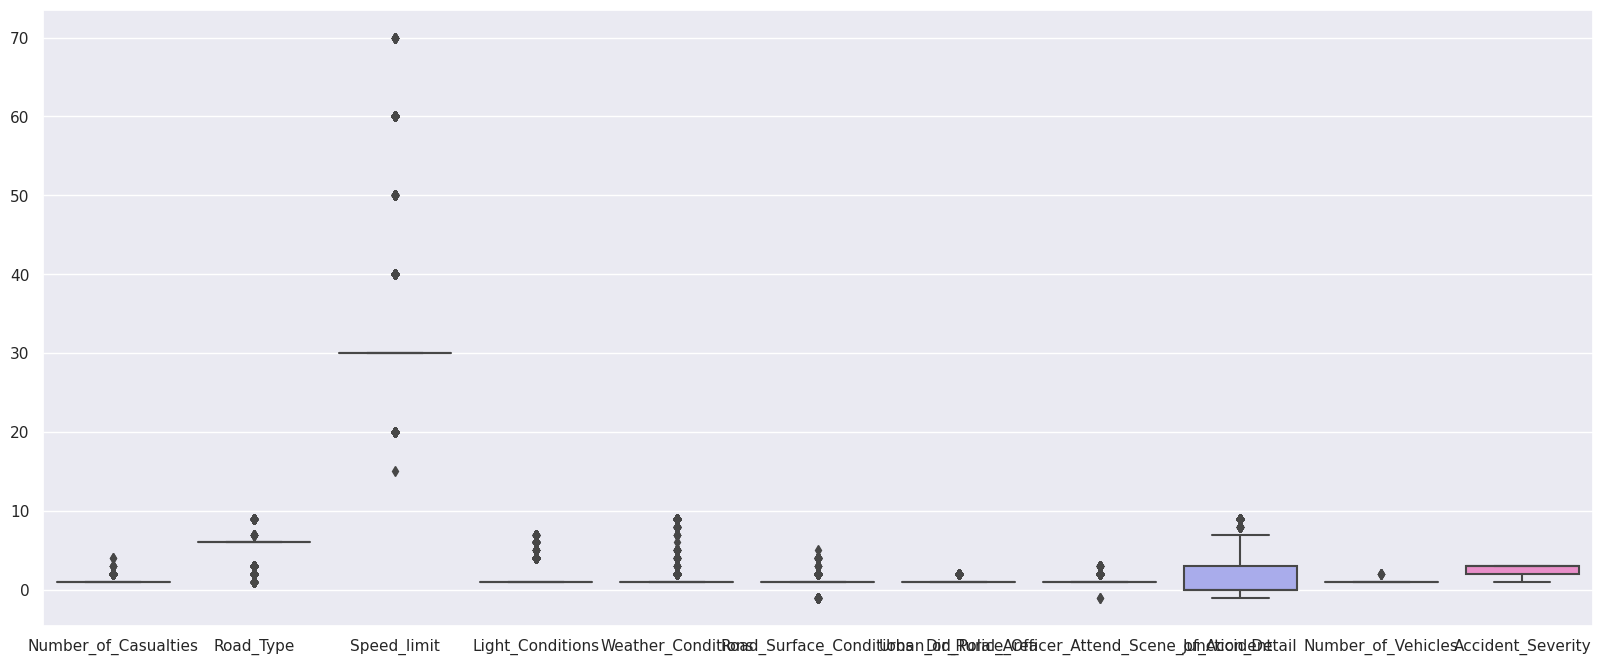

In [123]:
# Visualizacion de las variables numericas y categoricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_bicialpes, orient="v")

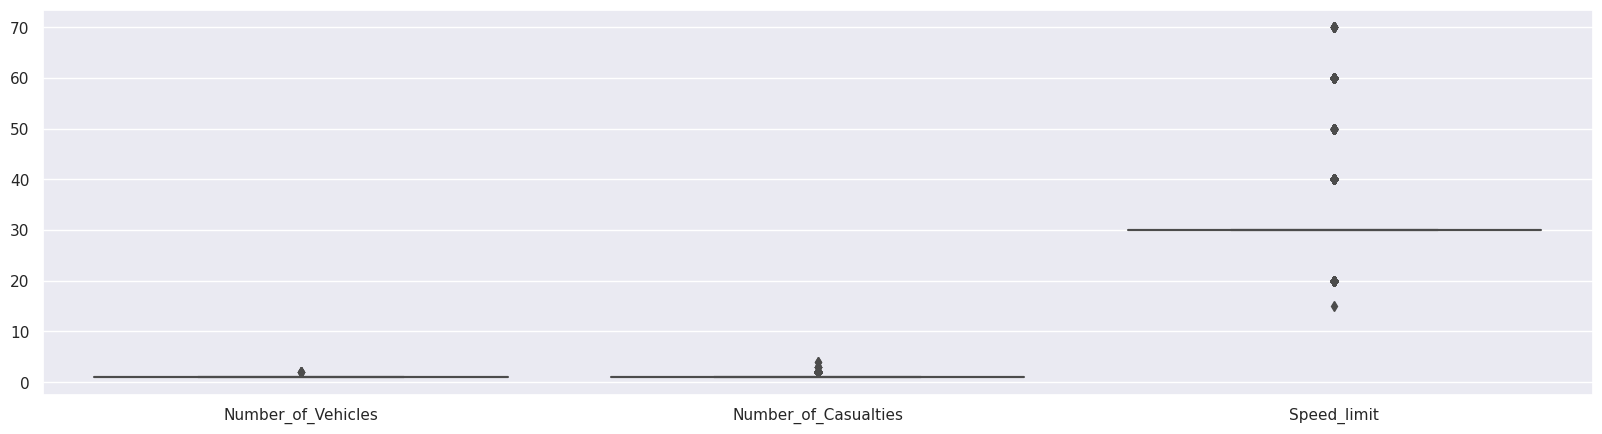

In [124]:
# Visualización de las variables numericas
fig = plt.figure(figsize=(20,5))
data = df_bicialpes[['Number_of_Vehicles','Number_of_Casualties','Speed_limit']]
ax = sns.boxplot(data=data, orient="v")

In [125]:
# Revisamos el contenido de las variables numericas
df_bicialpes[['Number_of_Vehicles','Number_of_Casualties','Speed_limit']].describe()

,Number_of_Vehicles,Number_of_Casualties,Speed_limit
count,5338.000000,5338.000000,5338.000000
mean,1.001124,1.118022,33.522855
std,0.033511,0.330694,10.206576
min,1.000000,1.000000,15.000000
25%,1.000000,1.000000,30.000000
50%,1.000000,1.000000,30.000000
75%,1.000000,1.000000,30.000000
max,2.000000,4.000000,70.000000


In [126]:
# Separación de la variable Speed limit (float) de variables int para ver mejor su contenido dada la diferencia de magnitudes en el dominio
name_cols_float = data.select_dtypes(include = ['float']).columns
name_cols_int = data.select_dtypes(include = ['int64']).columns
name_cols_int
#name_cols_float

Index(['Number_of_Vehicles', 'Number_of_Casualties'], dtype='object')

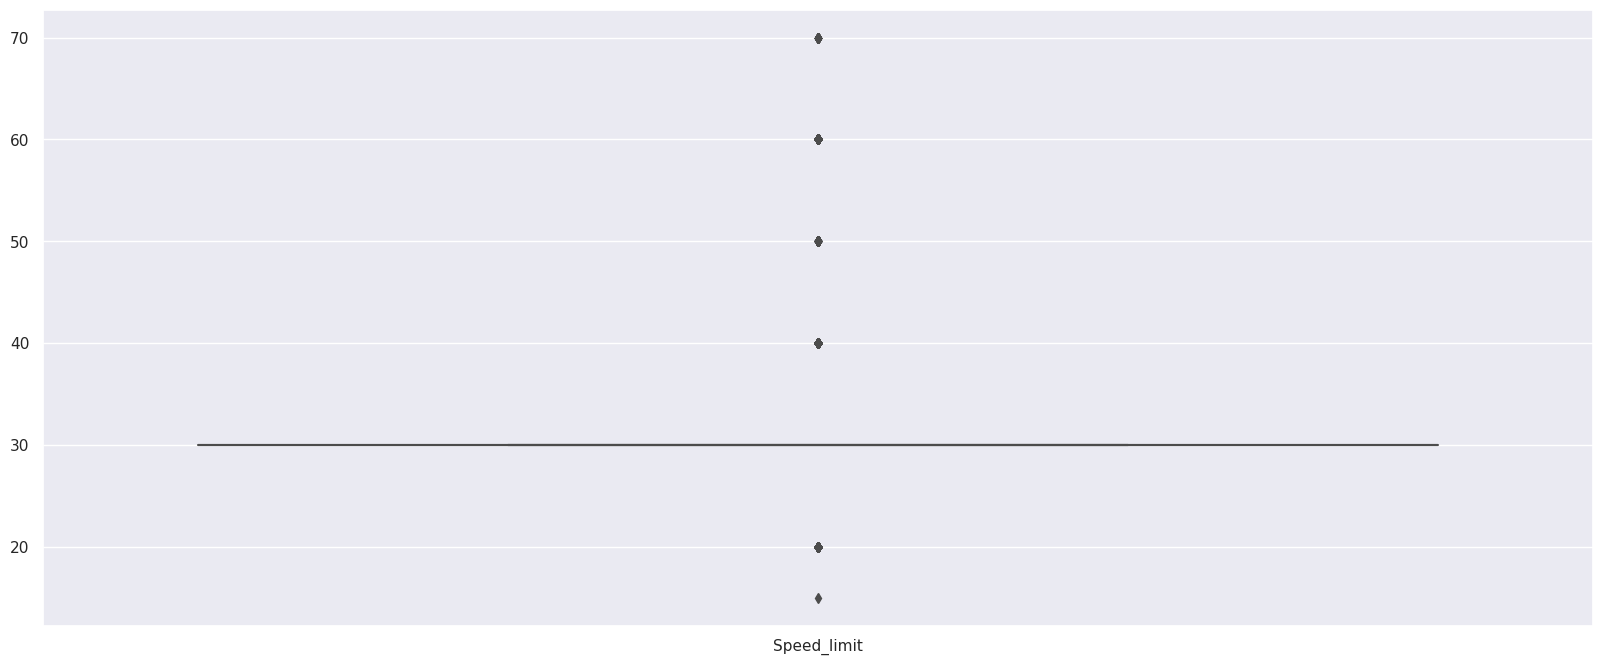

In [127]:
# Visualización de variables float
fig = plt.figure(figsize = (20, 8))
ax = sns.boxplot(data=df_bicialpes[name_cols_float], orient = "v")

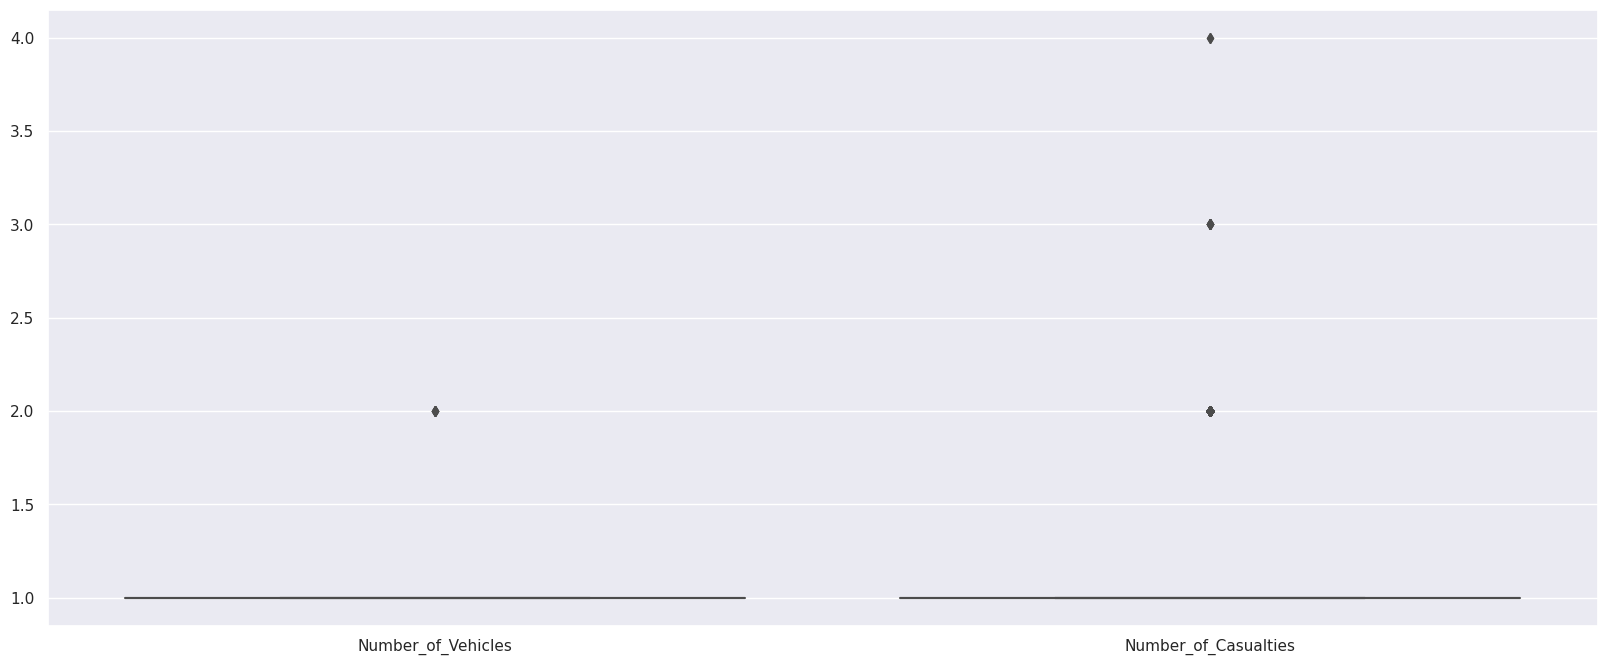

In [128]:
# Visualización de variables int
fig = plt.figure(figsize = (20, 8))
ax = sns.boxplot(data=df_bicialpes[name_cols_int], orient = "v")

In [129]:
# Exploramos variables que no sean numericas

name_cols_non_number = df_bicialpes.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['Time', 'Day_of_Week', 'Vehicle_Type'], dtype='object')

In [130]:
# Revisamos el contenido de las variables no numericas
df_bicialpes[name_cols_non_number].describe()

,Time,Day_of_Week,Vehicle_Type
count,5338,5319,5338
unique,4,2,1
top,Tarde,Día laboral,bike
freq,2171,3832,5338


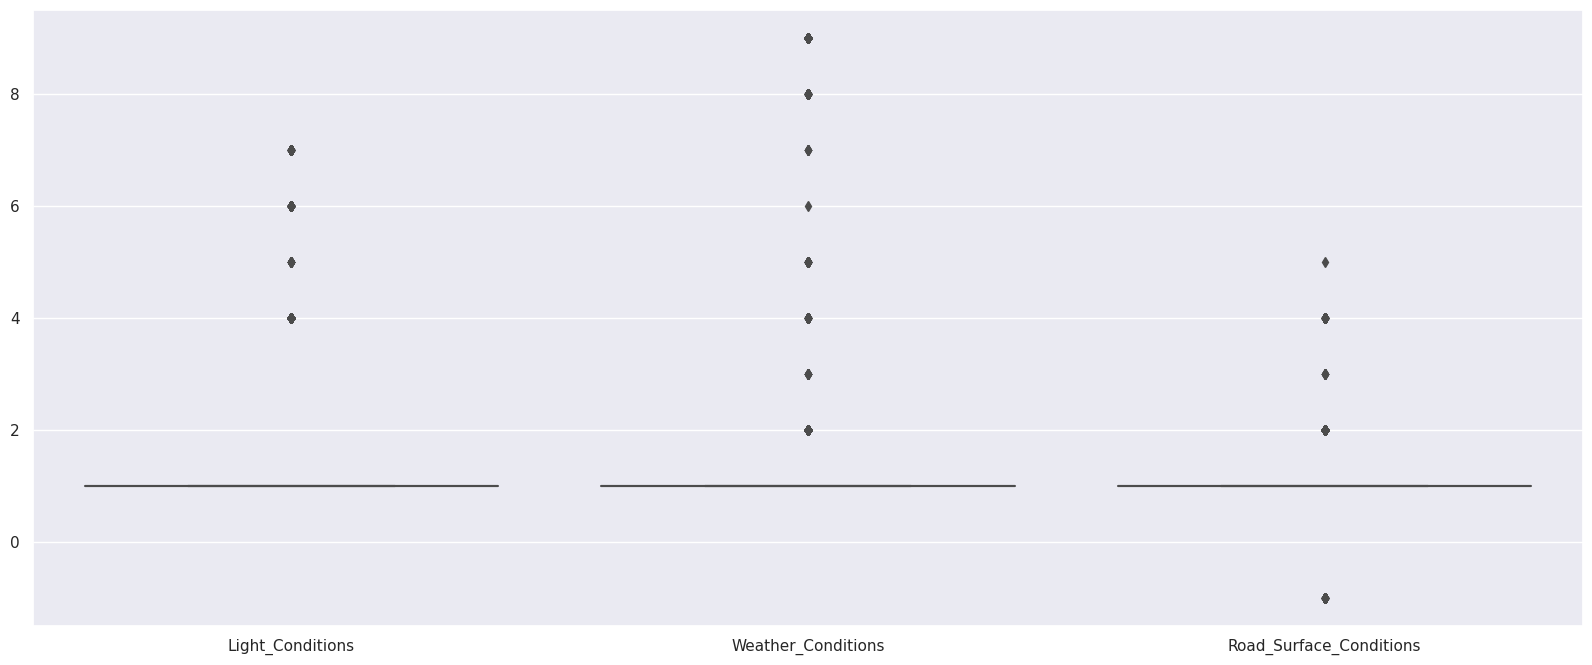

In [131]:
# Visualización de las variables categoricas Light_Conditions, Weather_Conditions, Road_Surface_Conditions

categorical_data = df_bicialpes[['Light_Conditions','Weather_Conditions','Road_Surface_Conditions']]
fig = plt.figure(figsize = (20, 8))
ax = sns.boxplot( data = categorical_data)


In [132]:
# Revisamos el contenido de las variables categoricas Light_Conditions, Weather_Conditions, Road_Surface_Conditions
categorical_data.describe()

,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
count,5338.000000,5338.000000,5338.000000
mean,1.712814,1.532222,1.191083
std,1.456428,1.760695,0.590522
min,1.000000,1.000000,-1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,7.000000,9.000000,5.000000


## 2. Preparación de los datos

### 2.1 Completitud

In [133]:
# Se calcula el porcentaje de valores nulos por columna
(df_bicialpes.isnull().sum()/df_bicialpes.shape[0]).sort_values(ascending=False)

Day_of_Week                                    0.003559
Time                                           0.000000
Number_of_Casualties                           0.000000
Road_Type                                      0.000000
Speed_limit                                    0.000000
Light_Conditions                               0.000000
Weather_Conditions                             0.000000
Road_Surface_Conditions                        0.000000
Urban_or_Rural_Area                            0.000000
Vehicle_Type                                   0.000000
Did_Police_Officer_Attend_Scene_of_Accident    0.000000
Junction_Detail                                0.000000
Number_of_Vehicles                             0.000000
Accident_Severity                              0.000000
dtype: float64

### 2.2 Unicidad / Duplicidad

Para este caso, no importa si hay valores duplicados pues es posible que ocurra más de un accidente bajo las mismas condiciones que otro.

### 2.3 Consistencia
#### 2.3.1 Categóricos
La mayoría de los datos están completos, es decir, no tienen campos nulos. Aunque el campo Day_of_week presenta un porcentaje de nulos, esta información no la consideramos relevante puesto que un dia de la semana no es determinante de un accidente vial

In [134]:
#VERIFICAMOS LOS VALORES DE TIME
df_bicialpes['Time'].value_counts()

Tarde        2171
Mañana       1684
Noche        1477
Madrugada       6
Name: Time, dtype: int64

In [135]:
#VERIFICAMOS LOS VALORES DE DAY OF WEEK
df_bicialpes['Day_of_Week'].value_counts()

Día laboral      3832
Fin de semana    1487
Name: Day_of_Week, dtype: int64

In [136]:
#VERIFICAMOS LOS VALORES DE VEHICLE TYPE
df_bicialpes['Vehicle_Type'].value_counts()

bike    5338
Name: Vehicle_Type, dtype: int64

#### 2.3.2 Númericos

In [137]:
#VERIFICAMOS LOS VALORES NUMERICOS PARA SABER SI LOS VALORES SON CONSISTENTES
number_cols = df_bicialpes.dtypes[(df_bicialpes.dtypes == np.int64) | (df_bicialpes.dtypes == np.float64)].index
number_cols = df_bicialpes.select_dtypes(include = ['int','float']).columns
df_bicialpes[number_cols].describe()

,Number_of_Casualties,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity
count,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000
mean,1.118022,5.587486,33.522855,1.712814,1.532222,1.191083,1.243162,1.247096,1.898464,1.001124,2.630761
std,0.330694,1.416573,10.206576,1.456428,1.760695,0.590522,0.429032,0.453389,2.456249,0.033511,0.518214
min,1.000000,1.000000,15.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,1.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
50%,1.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000
75%,1.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000
max,4.000000,9.000000,70.000000,7.000000,9.000000,5.000000,2.000000,3.000000,9.000000,2.000000,3.000000


### 2.4 Validez / Estandarización
#### Todos los datos cumplen con la estandarización

## 3. Modelamiento

### 3.1 Selección de variables 
Para este caso se tomarán inicialmente 2 variables, las cuales son categoricas. Estas son weather condition y Junction detail, puesto que consideramos determinantes estas variables en los accidentes viales de bicicletas


In [138]:
selected_cols=['Weather_Conditions','Junction_Detail']

## 3.2 Preparación de los datos 
Debido a que usaremos algoritmos que requieren datos númericos, es necesario convertir los datos categoricos a numeros. Sin embargo, los datos categoricos ya están transformados en números

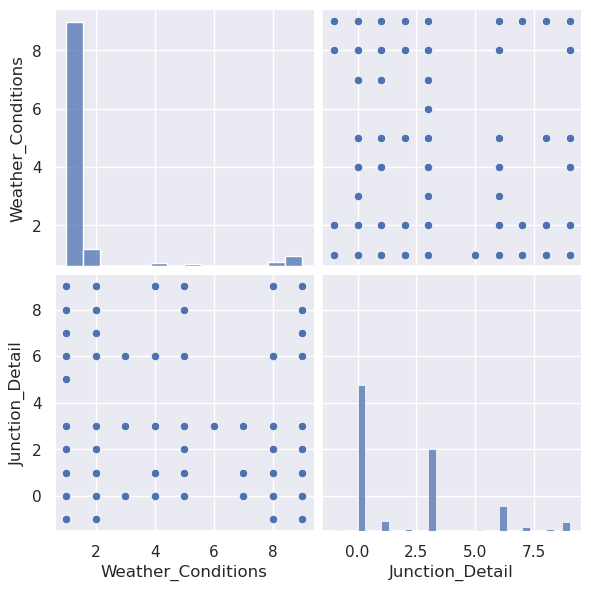

In [139]:
sns.pairplot(df_bicialpes, height=3,vars=selected_cols,kind='scatter')


## 3.3 Construcción de modelos
## 3.3.1 Construcción K-means()


### 3.3.1.1 Ajuste del modelo


In [140]:
# Debido a que empezaremos despacio, usaremos solamente 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0) # 2 clusters


kmeansp = kmeans.fit(df_bicialpes[selected_cols]) # las columnas seleccionadas fueron las que se graficaron en el parplot

/home/jj/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [141]:
cols_number=df_bicialpes[selected_cols].to_numpy() # convertimos las columnas seleccionadas a un arreglo de numpy
cols_number

array([[1, 3],
       [1, 0],
       [1, 3],
       ...,
       [5, 3],
       [1, 6],
       [1, 0]])

### 3.3.1.2 Visualización del resultado


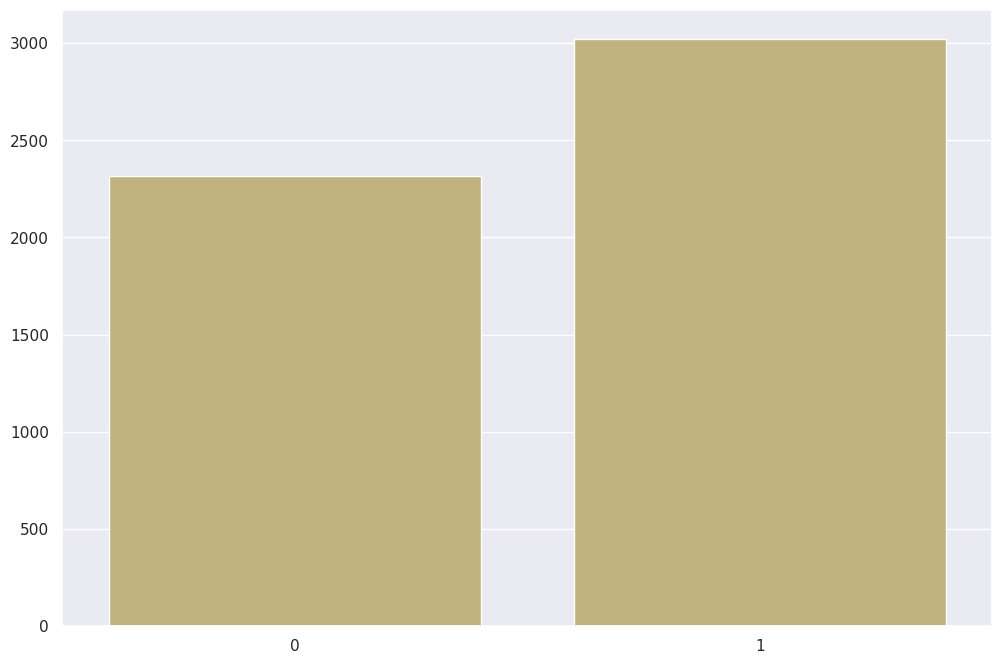

In [142]:
labels=kmeansp.labels_ # obtenemos los labels de los clusters
df_bicialpes['Cluster']=labels # agregamos los labels a nuestro dataframe
cluster_distrib=df_bicialpes['Cluster'].value_counts() # obtenemos la distribucion de los clusters

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='y');

In [143]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_bicialpes.groupby('Cluster').count()

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity
Cluster,,,,,,,,,,,,,,
0,2317,2317,2310,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317
1,3021,3021,3009,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021


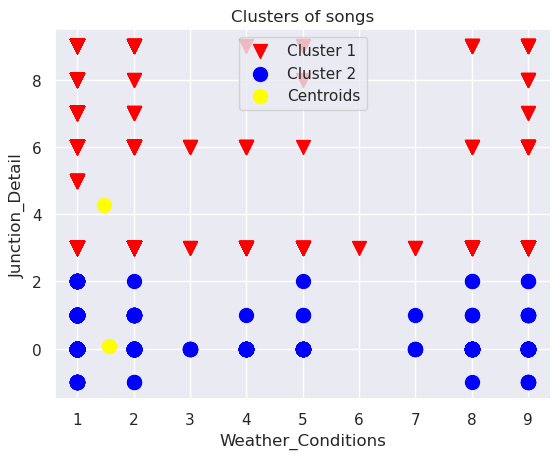

In [144]:
# Ver gráficamente los elementos de los diferentes clúster
plt.scatter(cols_number[kmeans.labels_ == 0, 0], cols_number[kmeans.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans.labels_ == 1, 0], cols_number[kmeans.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of songs')
plt.xlabel(selected_cols[0])
plt.ylabel(selected_cols[1])
plt.legend()
plt.show()

In [145]:
# Revisemos los valores de los centroides de los clústeres generados
print('Centroides: [[',selected_cols[0], ' ' , selected_cols[1], ']]', kmeans.cluster_centers_)

Centroides: [[ Weather_Conditions   Junction_Detail ]] [[1.48338369 4.26931377]
 [1.56967891 0.08010593]]


### 3.3.1.3 Número optimo de clusteres de acuerdo al metodo del codo

In [146]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

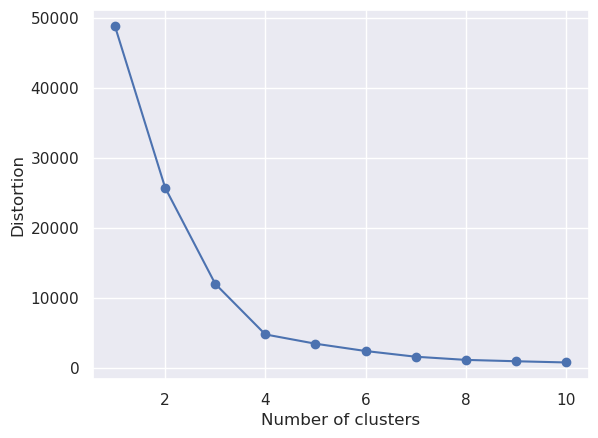

In [147]:
plot_distortion(df_bicialpes[selected_cols],1,11)

## 3.3.2 Construcción Gaussian Mixture
### 3.3.2.1 Ajuste del modelo

In [148]:
# Se empezarpa con 2 clústers
gaussianMixture = GaussianMixture(n_components=2, random_state=0)


gaussianMixturep = gaussianMixture.fit(df_bicialpes[selected_cols])

In [149]:
cols_number = df_bicialpes[selected_cols].to_numpy()
cols_number

array([[1, 3],
       [1, 0],
       [1, 3],
       ...,
       [5, 3],
       [1, 6],
       [1, 0]])

#### 3.3.2.2 Visualización del resultado con Gaussian Mixture

<AxesSubplot: >

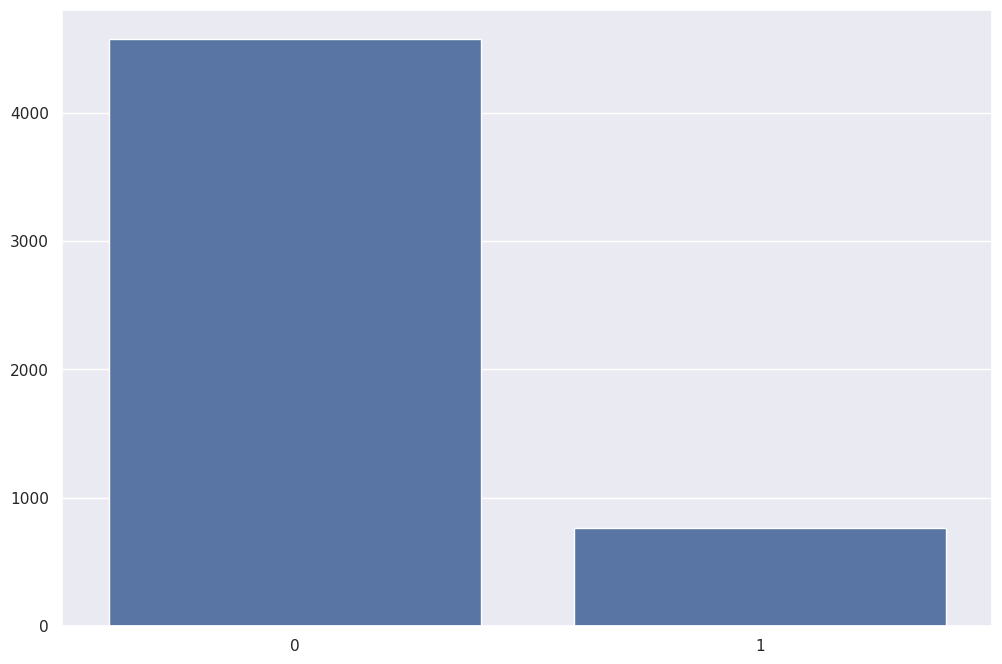

In [150]:
labels = gaussianMixturep.predict(df_bicialpes[selected_cols])

df_bicialpes['Cluster'] = labels
cluster_distrib = df_bicialpes['Cluster'].value_counts()

fig = plt.figure(figsize=(12, 8))
sns.barplot(x = cluster_distrib.index, y = cluster_distrib.values, color='b')

In [151]:
# Verfificar el número de elementos por clúster y las variables utilizadas
df_bicialpes.groupby('Cluster').count()

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity
Cluster,,,,,,,,,,,,,,
0,4576,4576,4562,4576,4576,4576,4576,4576,4576,4576,4576,4576,4576,4576
1,762,762,757,762,762,762,762,762,762,762,762,762,762,762


ValueError: 'c' argument has 5338 elements, which is inconsistent with 'x' and 'y' with size 10676.

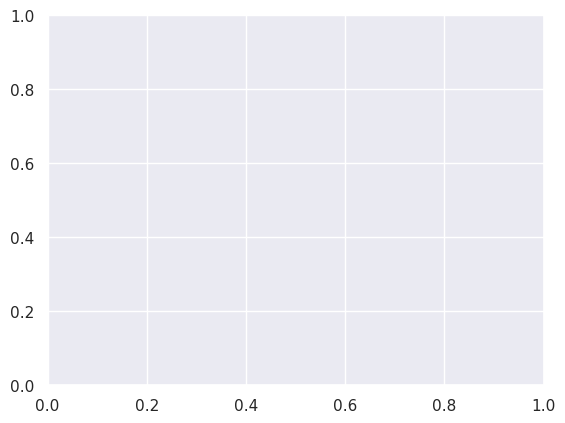

In [152]:
# Ver la gráfica con los clústers
# plt.scatter(cols_number[gaussianMixture.predict(selected_cols) == 0, 0], cols_number[gaussianMixture.predict(selected_cols) == 0, 1], s = 100, marker = 'v', c='red', label='Cluster 1')
# plt.scatter(cols_number[gaussianMixture.predict(selected_cols) == 1, 0], cols_number[gaussianMixture.predict(selected_cols) == 1, 1], s = 100, marker = 'o', c='blue', label='Cluster 2')
# TODO: Hacer la gráfica de GMM
plt.scatter((df_bicialpes[selected_cols]), (df_bicialpes[selected_cols]), c= labels, s = 40, cmap = 'viridis')
plt.show()

## 4. Validación

### 4.1 Validación cuantitativa

### 4.2 Validación cualitativa

## 5. Visualización